In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [33]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
df = df.drop(['doornumber', 'enginelocation', 'symboling', 'drivewheel', 'fueltype', 'aspiration', 'fuelsystem', 'citympg', 'enginetype', 'car_ID', 'CarName'], axis=1)

In [35]:
df.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,27,13495.0
1,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,27,16500.0
2,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,26,16500.0
3,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,30,13950.0
4,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,22,17450.0


In [36]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,54.000000,45400.000000


In [37]:
df = pd.get_dummies(df, columns=['carbody', 'cylindernumber'], drop_first=True)

In [39]:
features = df.columns.tolist()
features.remove('price')
target = 'price'

In [40]:
df = df[features + [target]].dropna()

In [41]:
x_train , x_test , y_train , y_test = train_test_split(df[features],df[target],test_size=0.2,random_state=42)

In [42]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [45]:
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)

In [49]:
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
print(f"\nModel Coefficients:\n{coefficients}")



Model Coefficients:
                  Feature   Coefficient
0               wheelbase    144.519285
1               carlength    -61.423749
2                carwidth    330.554557
3               carheight    262.029844
4              curbweight      1.102237
5              enginesize    135.652126
6               boreratio  -1586.761744
7                  stroke  -3654.018514
8        compressionratio    185.678931
9              horsepower     46.086980
10                peakrpm      2.062069
11             highwaympg     25.485593
12        carbody_hardtop  -2398.929392
13      carbody_hatchback  -5147.669824
14          carbody_sedan  -3827.710964
15          carbody_wagon  -5906.963686
16    cylindernumber_five   2825.484685
17    cylindernumber_four     47.159576
18     cylindernumber_six   -553.723439
19   cylindernumber_three      0.000000
20  cylindernumber_twelve -13918.885711
21     cylindernumber_two   8342.266634


In [50]:
print(f"R2Score: {r2:.4f}")
print(f"MeanSqauredError: {mse:.4f}")

R2Score: 0.8462
MeanSqauredError: 2403.2573


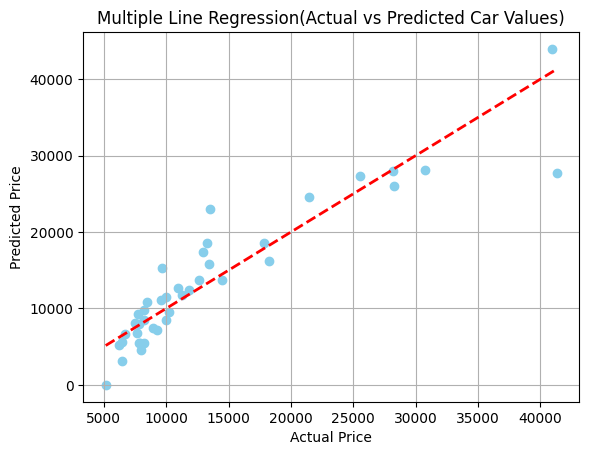

In [53]:
plt.scatter(y_test, y_pred, color='skyblue', alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
plt.title("Multiple Line Regression(Actual vs Predicted Car Values)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()